In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Problem 1:
Fit model parabol linear regression cho dữ liệu:  https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_square.csv

In [16]:
class LinearRegression:
    def fit(self, X, y):
        ones = np.ones(X.shape[0])
        self.X = np.c_[ones, X]
        inv_mat = np.linalg.inv(np.dot(self.X.T, self.X))
        self.coefs = np.dot(np.dot(inv_mat, self.X.T), y)

    def predict(self, X = None):
        if X is not None:
            ones = np.ones(X.shape[0])
            X = np.c_[ones, X]
            return np.dot(X, self.coefs)
        return np.dot(self.X, self.coefs)

In [17]:
def visualize(X, y, fitted_val):
    plt.scatter(X, y, c="blue")
    plt.plot(X, fitted_val, c="red")
    plt.xlabel("Diện tích")
    plt.ylabel("Giá nhà")
    plt.show()

In [18]:
non_linear = pd.read_csv("C:/Users/admin/OneDrive - National Economics University/ML/ML_AI4E/HW/W3/data_square.csv")
non_linear

,Diện tích,Giá nhà
0,30.0000,-100.0000
1,32.4138,-190.7250
2,34.8276,-269.7980
3,37.2414,-337.2180
4,39.6552,-392.9850
5,42.0690,-437.0990
6,44.4828,-469.5600
7,46.8966,-490.3690
8,49.3103,-499.5240
9,51.7241,-497.0270


In [19]:
non_linear["Diện tích 2"] = non_linear["Diện tích"]**2

In [20]:
lr = LinearRegression()
lr.fit(non_linear[["Diện tích", "Diện tích 2"]], non_linear["Giá nhà"])
y_pred = lr.predict()


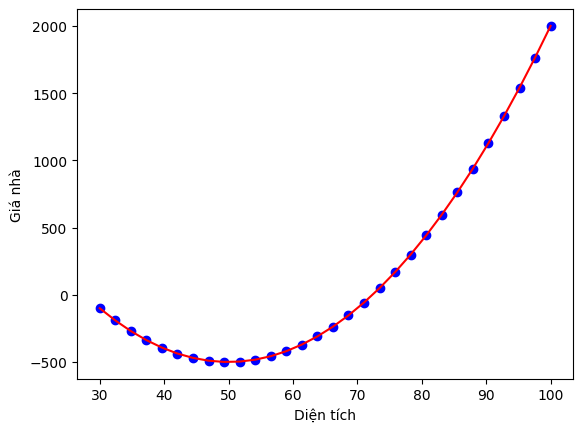

In [21]:
visualize(non_linear["Diện tích"], y_pred, non_linear["Giá nhà"])

#### Problem 2:

In [22]:
# Tự sinh dữ liệu
def create_data(func, sample_size=100, standard_deviation=0.25):
    x = np.linspace(0, 1, sample_size)
    t = func(x) + np.random.normal(scale=standard_deviation, size=x.shape)
    return x, t

def func(x):
    return np.sin(2 * np.pi * x)

In [23]:
# Evaluation metric
def mse(y_true: np.array, y_pred: np.array):
    return np.sum(np.power((y_pred - y_true), 2))/len(y_true)

def rmse(y_true: np.array, y_pred: np.array):
    return np.sqrt(np.sum(np.power((y_pred - y_true), 2))/len(y_true))

def mae(y_true: np.array, y_pred: np.array):
    return np.sum(np.abs(y_pred - y_true))/len(y_true)

def mape(y_true: np.array, y_pred: np.array):
    return np.mean(np.abs((y_true - y_pred)/y_true))*100


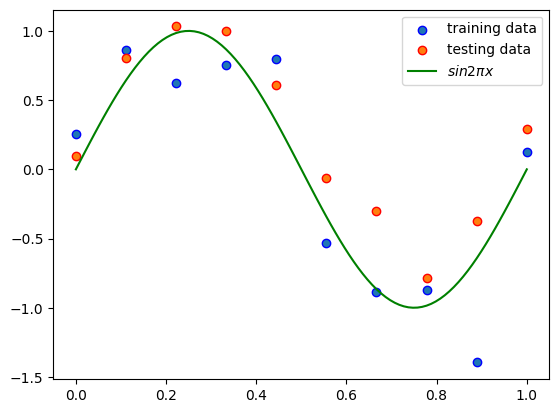

In [24]:
X_train, y_train = create_data(func, 10)
X_test, y_test = create_data(func, 10)
X_graph = np.linspace(0, 1, 100)
y_graph = func(X_graph)

plt.scatter(X_train, y_train, edgecolors='b', label = 'training data')
plt.scatter(X_test, y_test, edgecolors='r', label='testing data')
plt.plot(X_graph, y_graph, 'g', label = "$sin2\pi x$")
plt.legend()
plt.show()

In [25]:
def polynomial(X, n):
    return np.column_stack([X**p for p in range(1, n+1)])

In [26]:
# fit đa thức bậc 0, 1, 3, 6, 9, vẽ mô hình và nhận xét mô hình
# preparing data
X3 = polynomial(X_train, 3)
X6 = polynomial(X_train, 6)
X9 = polynomial(X_train, 9)
X3_test = polynomial(X_graph, 3)
X6_test = polynomial(X_graph, 6)
X9_test = polynomial(X_graph, 9)

In [27]:
def show_result(regression_model, X_train, y_train, X_graph, y_graph, X_test, y_test, y_pred, bac):
    print(f"RMSE on train set: {rmse(y_train, regression_model.predict())}")
    print(f"RMSE on test set: {rmse(y_test, regression_model.predict(polynomial(X_test, bac)))}")
    plt.scatter(X_train, y_train, edgecolors='b', label = 'training data')
    plt.scatter(X_test, y_test, edgecolors='r', label='testing data')
    plt.plot(X_graph, y_pred, 'g', label = "regression")
    plt.plot(X_graph, y_graph, 'orange', label = "sin2x")
    plt.title(f"Đa thức bậc {bac}")
    plt.legend()
    plt.show()

RMSE on train set: 0.5775827370182143
RMSE on test set: 0.5708587774459891


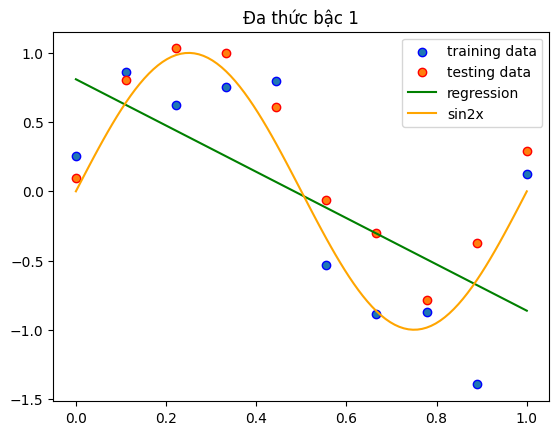

In [28]:
lr1 = LinearRegression()
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_graph)
show_result(lr1, X_train, y_train, X_graph, y_graph, X_test, y_test, y_pred, 1)

RMSE on train set: 0.2942876780815054
RMSE on test set: 0.333818935149008


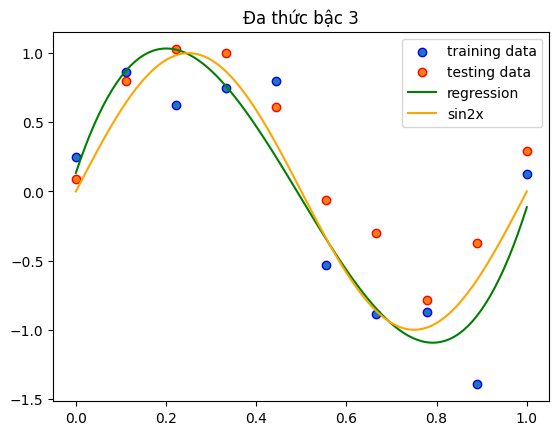

In [29]:
lr3 = LinearRegression()
lr3.fit(X3, y_train)
y_pred = lr3.predict(X3_test)
show_result(lr3, X_train, y_train, X_graph, y_graph, X_test, y_test, y_pred, 3)

RMSE on train set: 0.24256938072453177
RMSE on test set: 0.36352751736290645


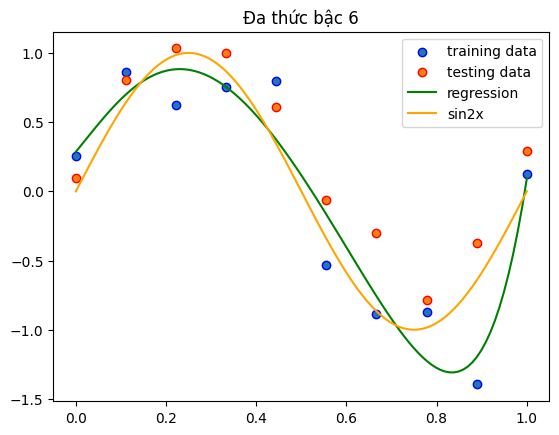

In [30]:
lr6 = LinearRegression()
lr6.fit(X6, y_train)
y_pred = lr6.predict(X6_test)
show_result(lr6, X_train, y_train, X_graph, y_graph, X_test, y_test, y_pred, 6)

RMSE on train set: 0.0002096133062562744
RMSE on test set: 0.439316539563372


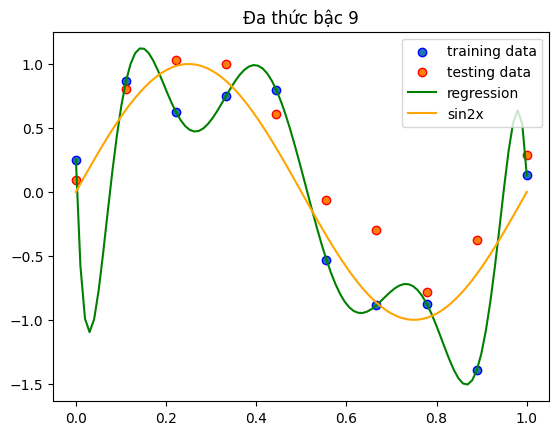

In [31]:
lr9 = LinearRegression()
lr9.fit(X9, y_train)
y_pred = lr9.predict(X9_test)
show_result(lr9, X_train, y_train, X_graph, y_graph, X_test, y_test, y_pred, 9)

- Model đa thức bậc 1 underfitting
- Model đa thức bậc 3 làm khá tốt
- Model đa thức bậc 6 bắt đầu có dấu hiệu của overfitting
- Model đa thức bậc 9 overfitting

In [32]:
# thêm 15 điểm dữ liệu cho đa thức bậc 9
X_train, y_train = create_data(func, 25)
X9_train = polynomial(X_train, 9)


RMSE on train set: 0.16003802323584265
RMSE on test set: 0.3184380533244225


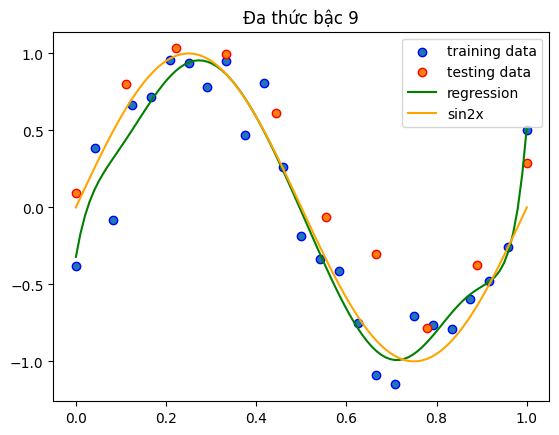

In [33]:
lr9 = LinearRegression()
lr9.fit(X9_train, y_train)
y_pred = lr9.predict(X9_test)
show_result(lr9, X_train, y_train, X_graph, y_graph, X_test, y_test, y_pred, 9)

Với việc thêm 15 điểm dữ liệu, có vẻ việc bị overfitting đã giảm xuống một chút

In [34]:
# Thêm 100 điểm dữ liệu cho đa thức bậc 9
X_train, y_train = create_data(func, 110)
X9_train = polynomial(X_train, 9)

RMSE on train set: 0.2511645488832414
RMSE on test set: 0.32546767199612


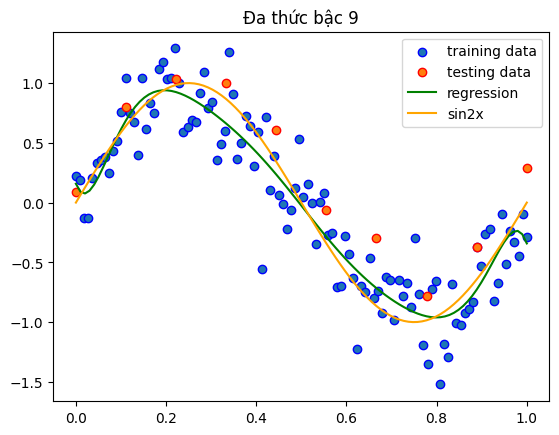

In [35]:
lr9 = LinearRegression()
lr9.fit(X9_train, y_train)
y_pred = lr9.predict(X9_test)
show_result(lr9, X_train, y_train, X_graph, y_graph, X_test, y_test, y_pred, 9)

Sau khi thêm 100 điểm dữ liệu, overfitting đã được xử lý hoàn toàn. Thậm chí model còn làm khá tốt khi đường regression và $sin2\pi x$ gần như trùng nhau


### Ridge Regression

From the posterior formula: 
$$
P(w|x,t) = \frac{P(t|x,w)P(w|\alpha)}{P(D)}
$$
with the prior $P(w|\alpha) = \mathcal{N}(w|0, \alpha^{-1}I)$ and the likelihood $P(t|x,w) = \Pi_{i = 1}^{N}P(t_i|x_i,w) = \Pi_{i = 1}^{N}\mathcal{N}\left(P(t_i|y(x_i,w), \sigma^2)\right)$

To find the w, we need to maximize the posterior. Since P(D) is constant, we only need to maximize $P(t|x,w)P(w|\alpha)$, which equal to maximize $\log\{P(t|x,w)P(w|\alpha)\}$ (1)

Have:
$$
\log\{P(t|x,w)P(w|\alpha)\}\\
= \log\{P(t|x,w)\} + log\{P(w|\alpha)\}\\
= \sum_{i=1}^{N}(\log\{\mathcal{N}\left(P(t_i|y(x_i,w), \sigma^2)\right)\}) + log\{\mathcal{N}(w|0, \lambda^{-1}I)\}\\
= \sum_{i=1}^{N}\left(\log \frac{1}{\sqrt(2\pi\sigma^2)} \cdot \exp \left(-\frac{(t_i-y(x_i,w))^2}{2\sigma^2}\right)\right) + \log\frac{1}{\sqrt((1\pi)^D\alpha^{-1}I)}\cdot\exp\left(-\frac{1}{2}w^T(\alpha^{-1}I)^{-1}w\right)\\
$$
Since $(\alpha^{-1}I)^{-1} = \alpha I$, $\frac{1}{\sqrt(2\pi\sigma^2)} = const$ and $\frac{1}{\sqrt((1\pi)^D\alpha^{-1}I)}=const$, maximize (1) equal to maximze:
$$
-\sum_{i=1}^{N} \left(t_i - y(x_i,w)\right)^2 - \frac{1}{2}\alpha w^Tw
$$
and equal to minimize:
$$
\sum_{i=1}^{N} \left(t_i - y(x_i,w)\right)^2 + \frac{1}{2}\alpha w^Tw
$$
Let $\frac{\alpha}{2} = \lambda$ ($\lambda > 0$), now, we need to minimze the loss function:
$$
L = \sum_{i=1}^{N} \left(t_i - y(x_i,w)\right)^2 + \frac{1}{2}\alpha w^Tw\\
= \|Xw-t\|^2 + \lambda\|w\|^2
$$
Take the derivative:
$$
\frac{\partial L}{\partial w} = 2X^T(Xw-t) + 2\lambda w = 0\\
\leftrightarrow (X^TX + \lambda I)w = X^Tt\\
\leftrightarrow w = (X^TX + \lambda I)^{-1}X^Tt
$$

In [36]:
class RidgeRegression:
    def __init__(self, lambda_ = 0.1):
        self.weights = None
        self.lambda_ = lambda_
    
    def fit(self, X, y, lambda_ = 0.1):        
        n = len(y)
        self.X = np.c_[np.ones(X.shape[0]), X]
        self.y = y
        id_mat = np.identity(self.X.shape[1])
        inv_mat = np.linalg.inv(np.dot(self.X.T, self.X) + self.lambda_*id_mat)
        self.weights = np.dot(inv_mat, np.dot(self.X.T, self.y))

    def predict(self, X_new = None):
        if X_new is not None:
            X_new = np.c_[np.ones(X_new.shape[0]), X_new]
            return np.dot(X_new, self.weights)
        return np.dot(self.X, self.weights)

In [51]:
X_train, y_train = create_data(func, 10)
X9_train = polynomial(X_train, 9)

RMSE on train set: 0.00024277651755897996
RMSE on test set: 0.36418036877661547


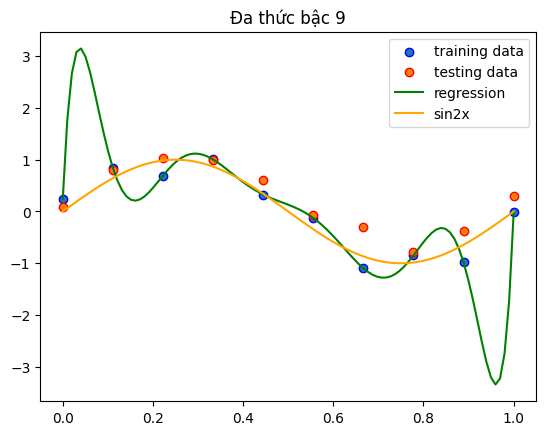

In [52]:
lr9 = LinearRegression()
lr9.fit(X9_train, y_train)
y_pred = lr9.predict(X9_test)
show_result(lr9, X_train, y_train, X_graph, y_graph, X_test, y_test, y_pred, 9)

RMSE on train set: 0.1690032821414343
RMSE on test set: 0.2984025271665295


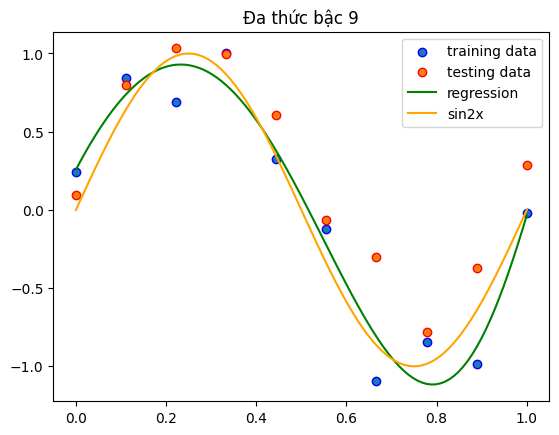

In [53]:
rr = RidgeRegression(2e-5)
rr.fit(X9_train, y_train)
y_pred = rr.predict(X9_test)
show_result(rr, X_train, y_train, X_graph, y_graph, X_test, y_test, y_pred, 9)

### Lasso regression

Lasso regression model : $y = Xw + b$

The loss of Lasso regression is defined as:
$$
L(w) = \frac{1}{N} \sum_{i=1}^{N}(t_i - y(x_i,w))^2 + \lambda |w|
$$
The derivative of $L$ with respect to $w$:

- If $w_j > 0$:
$$
\frac{\partial L}{\partial w_j} = -\frac{2}{N} \sum_{i=1}^{N}x_j(t_i - y(x_i,w)) + \lambda
$$
- If $w_j < 0$:
$$
\frac{\partial L}{\partial w_j} = -\frac{2}{N} \sum_{i=1}^{N}x_j(t_i - y(x_i,w)) - \lambda
$$
The derivative of $L$ with respect to $b$:
$$
\frac{\partial L}{\partial b} = \frac{2}{N} \sum_{i=1}^{N}(t_i - y(x_i,w))
$$

In [40]:
class LassoRegression:

  def __init__(self, learning_rate, n_iters, lambda_):
    self.learning_rate = learning_rate
    self.n_iters = n_iters
    self.lambda_ = lambda_

  def fit(self, X, Y):
    self.r, self.c = X.shape
    self.w = np.zeros(self.c)
    self.b = 0
    self.X = X
    self.Y = Y
    for i in range(self.n_iters):     
      self.upadte_weights()

  def upadte_weights(self):
    Y_prediction = self.predict()
    dw = np.zeros(self.c)
    for i in range(self.c):
      if self.w[i]>0:
        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) + self.lambda_) / self.r 
      else :
        dw[i] = (-(2*(self.X[:,i]).dot(self.Y - Y_prediction)) - self.lambda_) / self.r
    db = - 2 * np.sum(self.Y - Y_prediction) / self.r

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self,X = None):
    if X is None:
      return self.X.dot(self.w) + self.b
    return X.dot(self.w) + self.b




RMSE on train set: 0.7023547248084431
RMSE on test set: 0.6310115683393619


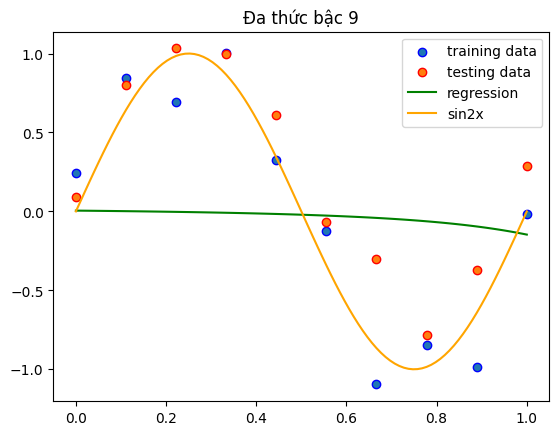

In [55]:
temp = LassoRegression(learning_rate = 1e-5, n_iters=10000,
                         lambda_=0.1)
temp.fit(X9_train, y_train)
y_pred = temp.predict(X9_test)
show_result(temp, X_train, y_train, X_graph, y_graph, X_test, y_test, y_pred, 9)